In [ ]:
# plots grads change and test loss change

In [ ]:
import pickle
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# heatmap visualization
import sys
sys.path.insert(0,'/Users/zhengxuanw/Dropbox/ABSA-transformer/code/')
sys.path.insert(0,'/Users/zhengxuanw/Dropbox/ABSA-transformer/code/model/')
from model.ContextBERT import *

import pickle
import re
import os

import random
import numpy as np
import torch
from random import shuffle
import argparse
import pickle

import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from model.BiLSTM import *
from model.BERT import *
from model.BERTSimple import *
from model.ContextBERT import *
from model.HeadwiseContextBERT import *

from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.distributed import DistributedSampler
from torch.utils.data.sampler import RandomSampler, SequentialSampler
from tqdm import tqdm, trange

from util.optimization import BERTAdam
from util.processor import (Sentihood_NLI_M_Processor,
                            Semeval_NLI_M_Processor)

from util.tokenization import *

from evaluation import *

from util.processor import *
from run_classifier_TABSA import *

import seaborn as sns; sns.set()
plt.rcParams["font.family"] = "Times New Roman"

In [ ]:
# init grad
init_grad = pickle.load(open("grads_out_init.p", "rb"))

def GradDiff(grad1, grad2):
    batch_count = len(grad1)
    dist = 0.0
    cos = nn.CosineSimilarity(dim=-1, eps=1e-12)
    sample_count = 0 
    for i in range(0, batch_count):
        sample_count += grad1[i].shape[0]
        dist += cos(grad1[i], grad2[i]).sum()
    return dist / sample_count

time_steps = 30
grads_list = []
for i in range(time_steps):
    file_in = "grads_out_" + str(i+1) + ".p"
    curr_grad = pickle.load(open(file_in, "rb"))
    grads_list.append(GradDiff(curr_grad, init_grad).tolist())

# quasi semeval
grads = [1, 0.7454711198806763, 0.771233081817627, 0.7722960114479065, 0.7754009366035461, 0.7392681837081909, 0.7296900153160095, 0.7294723391532898, 0.7259636521339417, 0.7202203869819641, 0.7011971473693848, 0.5905196070671082, 0.5566345453262329, 0.46856555342674255, 0.42534950375556946, 0.5280004143714905, 0.5969454646110535, 0.5390850901603699, 0.4423533082008362, 0.35109469294548035, 0.4064408838748932, 0.34320950508117676, 0.3228585124015808, 0.28380513191223145, 0.27977651357650757, 0.4656696319580078, 0.30781835317611694, 0.32146260142326355, 0.4753910303115845, 0.41164177656173706, 0.28187230229377747]
grads = grads[:25]

In [ ]:
f1_scores = [0, 0, 0.02, 0.06, 0.10844, 
             0.0324, 0.24655, 0.3123, 0.779249, 0.816008,
             0.8864097363083164, 0.8972431077694235, 0.8982278481012658,
             0.8947630922693267, 0.8964143426294822, 0.898580121703854,
             0.8984220907297831, 0.896551724137931, 0.9009649568308786,
             0.887634684453566, 0.9015188633023027, 0.887202832574608, 
             0.8989547038327527, 0.887218045112782, 0.8923235445646575]

In [ ]:
print(len(grads))

In [ ]:
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
g, = ax.plot(grads, linestyle='-', marker='s', color='b', markerfacecolor='none')
f, = ax.plot(f1_scores, linestyle='-', marker='^', color='r', markerfacecolor='none')
plt.legend([g, f], ['Gradient', 'Acurracy'], fontsize=25)
plt.tight_layout()
plt.grid(color='black', linestyle='-.')
plt.xlim(0, 24)
plt.ylim(0, 1)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=30)
plt.xticks([0, 5, 10, 15, 20, 24], ["1", "5", "10", "15", "20", "25"], fontsize=30)


In [ ]:
# non-quasi semeval
f1_scores = [0, 0, 0.023054755043227668, 0.038058991436726926, 0.1288076588337685,
             0.032411820781696854, 0.11713286713286714, 0.1232638888888889, 0.22222222222222224,
             0.22915042868277471, 0.33781965006729475, 0.21283509341998375, 0.25473843821076575, 
             0.24653312788906007, 0.25636942675159236, 0.4005847953216374, 0.7964514539181863, 
             0.7791780821917808, 0.8587229763700353, 0.8710801393728222, 0.8763468445356594, 
             0.8802005012531329, 0.8944472236118058, 0.9077050830397585, 0.9178833584715937]
grads = [1, 0.7509065866470337, 0.768349289894104, 0.7725350856781006, 0.7672097086906433, 0.7408936619758606, 0.7251231670379639, 0.7309643626213074, 0.7327697277069092, 0.722244143486023, 0.7165133953094482, 0.7046288251876831, 0.7111701369285583, 0.7089152336120605, 0.6848648190498352, 0.6731955409049988, 0.655868649482727, 0.6494279503822327, 0.5999982953071594, 0.6499956250190735, 0.5288066864013672, 0.4675033390522003, 0.508086621761322, 0.5115203857421875, 0.39776304364204407, 0.37396442890167236, 0.4799198806285858, 0.3657478094100952, 0.3111937642097473, 0.38044482469558716, 0.3453109860420227]
grads = grads[:25]



In [ ]:
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
g, = ax.plot(grads, linestyle='-', marker='s', color='b', markerfacecolor='none')
f, = ax.plot(f1_scores, linestyle='-', marker='^', color='r', markerfacecolor='none')
plt.tight_layout()
plt.grid(color='black', linestyle='-.')
plt.xlim(0, 24)
plt.ylim(0, 1)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=30)
plt.xticks([0, 5, 10, 15, 20, 24], ["1", "5", "10", "15", "20", "25"], fontsize=30)

In [ ]:
# quasi-sentihood
f1_scores = [0.45471582266365185, 0.7887223811939732, 0.8013508765897253, 0.8182574715096568,
             0.8218113806155452, 0.8076130582054173, 0.8111011294004168, 0.8210133092648388, 
            0.8102800153543908, 0.8082521995934046, 0.8143646397042046, 0.8059704504217384,
            0.8190996191958383, 0.8652401772363258, 0.9209375625228751, 0.9140689398660004, 
            0.9247600064538062, 0.9376626454584225, 0.9073721034398871, 0.9234180270394464, 
            0.9221389351646975, 0.9272878330873275, 0.9372103640775333, 0.9258522953640869, 
            0.9452853977113524, 0.9552853977113524]
grads = [1, 0.6710836291313171, 0.664985716342926, 0.6467165350914001, 0.6104057431221008, 0.5920002460479736, 0.5893218517303467, 0.5591245293617249, 0.5217680335044861, 0.5314010381698608, 0.5395297408103943, 0.5155467391014099, 0.5178194046020508, 0.5221627950668335, 0.5345546007156372, 0.4713890552520752, 0.477617084980011, 0.4602060914039612, 0.4370739758014679, 0.4571017026901245, 0.36851853132247925, 0.39174631237983704, 0.41272562742233276, 0.3163086771965027, 0.34830227494239807, 0.4129435122013092, 0.3338128328323364, 0.33092233538627625, 0.25370097160339355, 0.3036431074142456, 0.3181217908859253]
grads = grads[:25]

plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
g, = ax.plot(grads, linestyle='-', marker='s', color='b', markerfacecolor='none')
f, = ax.plot(f1_scores, linestyle='-', marker='^', color='r', markerfacecolor='none')
plt.tight_layout()
plt.grid(color='black', linestyle='-.')
plt.xlim(0, 24)
plt.ylim(0, 1)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=30)
plt.xticks([0, 5, 10, 15, 20, 24], ["1", "5", "10", "15", "20", "25"], fontsize=30)

In [ ]:
# non-quasi sentihood

f1_scores = [0.45471582266365185, 0.7985617369217178, 0.795571233873186, 0.8102503020224604,
             0.815624520367763, 0.6204055080409367, 0.8402420504584572, 0.9180681090948207, 
             0.9301930621985279, 0.9112134373710598, 0.9383638585217782, 0.9456719251140596, 
             0.9500713691786066, 0.9523813647572223, 0.9488866028626513, 0.9661040398921299,
             0.9492457781154886, 0.9409183620687862, 0.9395640477867347, 0.9336767506962838,
             0.9435195364711321, 0.9122093067859192, 0.9377301545499019, 0.9430406470274768, 
             0.9428719557916341, 0.9528719557916341]
grads = [1, 0.7110836291313171, 0.724985716342926, 0.7067165350914001, 0.7104057431221008, 0.6920002460479736, 
         0.6793218517303467, 0.6291245293617249, 0.6517680335044861, 0.6414010381698608, 0.6395297408103943, 
         0.6355467391014099, 0.6478194046020508, 0.6121627950668335, 0.5845546007156372, 0.5713890552520752, 
         0.527617084980011, 0.5502060914039612, 0.5170739758014679, 0.4971017026901245, 0.51851853132247925, 
         0.48174631237983704, 0.47272562742233276, 0.4163086771965027, 0.39830227494239807, 0.4129435122013092, 
         0.3338128328323364, 0.33092233538627625, 0.25370097160339355, 0.3036431074142456, 0.3181217908859253]
grads = grads[:25]

plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
g, = ax.plot(grads, linestyle='-', marker='s', color='b', markerfacecolor='none')
f, = ax.plot(f1_scores, linestyle='-', marker='^', color='r', markerfacecolor='none')
plt.tight_layout()
plt.grid(color='black', linestyle='-.')
plt.xlim(0, 24)
plt.ylim(0, 1)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=30)
plt.xticks([0, 5, 10, 15, 20, 24], ["1", "5", "10", "15", "20", "25"], fontsize=30)


In [ ]:
# analyze quasi-attention weights and gates
memo_bundle = torch.load("./memo_bundle.pt", map_location=torch.device('cpu'))

In [ ]:
memo_bundle = memo_bundle[0]

In [ ]:
# attention_probs
# quasi_attention_scores
# lambda_context
# combined_attention_probs

layer_index = 0
for layer_memo in memo_bundle:
    print("layer="+str(layer_index+1))
#     lambda_context = layer_memo["lambda_q"][0]
#     print(lambda_context)
#     break
    lambda_context_avg = lambda_context.mean().tolist()
    print(lambda_context_avg)
    layer_index += 1

In [ ]:
memo_bundle[3]["lambda_k"]

In [3]:
def getModelOptimizerTokenizer(model_type, vocab_file, embed_file=None, 
                               bert_config_file=None, init_checkpoint=None,
                               label_list=None,
                               do_lower_case=True,
                               num_train_steps=None,
                               learning_rate=None,
                               base_learning_rate=None,
                               warmup_proportion=None):
    if embed_file is not None:
        # in case pretrain embeddings
        embeddings = pickle.load(open(embed_file, 'rb'))
        
    # this is the model we develop
    tokenizer = FullTokenizer(
        vocab_file=vocab_file, do_lower_case=do_lower_case, pretrain=False)
    if bert_config_file is not None:
        bert_config = BertConfig.from_json_file(bert_config_file)
    else:
        # default?
        bert_config = BertConfig(
            hidden_size=768,
            num_hidden_layers=12,
            num_attention_heads=12,
            intermediate_size=3072,
            hidden_act="gelu",
            hidden_dropout_prob=0.1,
            attention_probs_dropout_prob=0.1,
            max_position_embeddings=512,
            type_vocab_size=2,
            initializer_range=0.02
        )
    # overwrite the vocab size to be exact. this also save space incase
    # vocab size is shrinked.
    bert_config.vocab_size = len(tokenizer.vocab)
    # model and optimizer
    model = ContextAwareBertForSequenceClassification(
                bert_config, len(label_list),
                init_weight=False)
    
    checkpoint = torch.load(init_checkpoint, map_location='cpu')
    adjust_checkpoint = dict()
    for param_tensor in checkpoint.keys():
        adjust_checkpoint[param_tensor[7:]] = checkpoint[param_tensor]

    model.load_state_dict(adjust_checkpoint)
    #######################################################################
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    #######################################################################
    return model, optimizer, tokenizer


In [4]:
model, optimizer, tokenizer = \
    getModelOptimizerTokenizer("ContextBERT", 
                           vocab_file="../data/uncased_L-12_H-768_A-12/vocab.txt",
                           bert_config_file="../data/uncased_L-12_H-768_A-12/bert_config.json",
                           init_checkpoint="./sentihood_checkpoint.bin",
                           label_list=['None', 'Positive', 'Negative'],
                           num_train_steps=1,
                           learning_rate=2e-5,
                           base_learning_rate=2e-5,
                           warmup_proportion=0.1)

In [54]:
test_in = InputExample(guid="0-0", 
                       text_a="Thanks LOCATION1 has highest average living costs but is safest and poshest , LOCATION2 is the roughest area but cheapest all round", 
                       text_b='location - 1 - price', 
                       label="Positive")

tokens_a = tokenizer.tokenize(test_in.text_a)

test_features = convert_examples_to_features(
    [test_in], ['None', 'Positive', 'Negative'], 512,
    tokenizer, 6,
    True)

all_input_ids = torch.tensor([f.input_ids for f in test_features], dtype=torch.long)
all_input_mask = torch.tensor([f.input_mask for f in test_features], dtype=torch.long)
all_segment_ids = torch.tensor([f.segment_ids for f in test_features], dtype=torch.long)
all_label_ids = torch.tensor([f.label_id for f in test_features], dtype=torch.long)
all_seq_len = torch.tensor([[f.seq_len] for f in test_features], dtype=torch.long)
all_context_ids = torch.tensor([f.context_ids for f in test_features], dtype=torch.long)
all_context_len = torch.tensor([[f.context_len] for f in test_features], dtype=torch.long)
target_id_convert = [[0,1,2,3], [4,5,6,7]]
all_target_ids = torch.tensor([target_id_convert[f.target_id] for f in test_features], dtype=torch.long)

test_data = TensorDataset(all_input_ids, all_input_mask, all_segment_ids,
                          all_label_ids, all_seq_len, all_context_ids,
                          all_context_len, all_target_ids)
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=False)


100%|██████████| 1/1 [00:00<00:00, 718.33it/s]


In [55]:
model.eval()
grads = None
memo_bundle = None
for input_ids, input_mask, segment_ids, label_ids, seq_lens, \
    context_ids, context_lens, all_target_ids in test_dataloader:
    max_seq_lens = max(seq_lens)[0]
    input_ids = input_ids[:,:max_seq_lens]
    input_mask = input_mask[:,:max_seq_lens]
    segment_ids = segment_ids[:,:max_seq_lens]
    tmp_test_loss, logits, embedding_output, all_encoder_memo_bundle, _ = \
        model(input_ids, segment_ids, input_mask, seq_lens,
                device=torch.device("cpu"), labels=label_ids,
                context_ids=context_ids,
                context_lens=context_lens)

    logits = F.softmax(logits, dim=-1)
    sensitivity_class = 1
    sensitivity_grads = torch.zeros(logits.shape)
    sensitivity_grads[:,sensitivity_class] = 1.0
    grads_in = torch.autograd.grad(logits, embedding_output, grad_outputs=sensitivity_grads)[0]
    grads_in_norm = torch.norm(grads_in, dim=-1) * torch.norm(grads_in, dim=-1)
    max_grads = torch.max(grads_in_norm)
    grads_in_norm = grads_in_norm / max_grads
    print(grads_in_norm.shape)
    grads = grads_in_norm.squeeze(dim=0).tolist()
    memo_bundle = all_encoder_memo_bundle
    print(logits)

torch.Size([1, 31])
tensor([[0.0164, 0.0988, 0.8847]], grad_fn=<SoftmaxBackward>)


In [56]:
tokens_a_new = ["[CLS]"] + tokens_a + ["[SEP]"]
print(len(tokens_a_new))

31


In [57]:
list(zip(tokens_a_new, grads))

[('[CLS]', 0.015483628027141094),
 ('thanks', 0.07659727334976196),
 ('location', 0.02283579856157303),
 ('##1', 0.02936406061053276),
 ('has', 0.03458936884999275),
 ('highest', 0.13893410563468933),
 ('average', 0.08896587789058685),
 ('living', 0.08794022351503372),
 ('costs', 1.0),
 ('but', 0.029467273503541946),
 ('is', 0.014227394014596939),
 ('safe', 0.08752273768186569),
 ('##st', 0.03862462192773819),
 ('and', 0.016032399609684944),
 ('po', 0.15097376704216003),
 ('##sh', 0.7230157852172852),
 ('##est', 0.08469756692647934),
 (',', 0.028957849368453026),
 ('location', 0.040933165699243546),
 ('##2', 0.017027543857693672),
 ('is', 0.013930792920291424),
 ('the', 0.016729407012462616),
 ('rough', 0.12700320780277252),
 ('##est', 0.022745544090867043),
 ('area', 0.06409606337547302),
 ('but', 0.022327423095703125),
 ('cheap', 0.8606501817703247),
 ('##est', 0.2365674525499344),
 ('all', 0.06792391836643219),
 ('round', 0.04317764937877655),
 ('[SEP]', 0.01861918717622757)]

In [58]:
def heatmap_viz(token_grad):
    scores = [tu[1] for tu in token_grad]
    tokens = [tu[0] for tu in token_grad]
    fig, ax = plt.subplots(figsize=(10,1))
    ax = sns.heatmap([scores], cmap="Blues", xticklabels=tokens, yticklabels=False,
                     cbar_kws=dict(shrink=1, aspect=4, ), linewidths=0.8)
    ax.set_xticklabels(tokens, size = 18)
    cbar = ax.collections[0].colorbar
    # here set the labelsize by 20
    cbar.ax.tick_params(labelsize=20)
    plt.show()

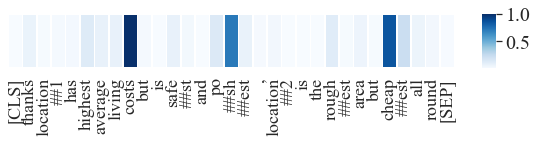

In [59]:
heatmap_viz(list(zip(tokens_a_new, grads)))

In [ ]:
# quasi attention distribution
model, optimizer, tokenizer = \
    getModelOptimizerTokenizer("ContextBERT", 
                           vocab_file="../data/uncased_L-12_H-768_A-12/vocab.txt",
                           bert_config_file="../data/uncased_L-12_H-768_A-12/bert_config.json",
                           init_checkpoint="./quasi/sentihood_checkpoint.bin",
                           label_list=['None', 'Positive', 'Negative'],
                           num_train_steps=1,
                           learning_rate=2e-5,
                           base_learning_rate=2e-5,
                           warmup_proportion=0.1)

In [ ]:
processors = {
    "sentihood_NLI_M":Sentihood_NLI_M_Processor,
    "semeval_NLI_M":Semeval_NLI_M_Processor
}

processor = processors["sentihood_NLI_M"]()
label_list = processor.get_labels()

test_examples = processor.get_test_examples("../data/sentihood/bert-pair/")
test_features = convert_examples_to_features(
    test_examples, label_list, 512,
    tokenizer, 6,
    True)

all_input_ids = torch.tensor([f.input_ids for f in test_features], dtype=torch.long)
all_input_mask = torch.tensor([f.input_mask for f in test_features], dtype=torch.long)
all_segment_ids = torch.tensor([f.segment_ids for f in test_features], dtype=torch.long)
all_label_ids = torch.tensor([f.label_id for f in test_features], dtype=torch.long)
all_seq_len = torch.tensor([[f.seq_len] for f in test_features], dtype=torch.long)
all_context_ids = torch.tensor([f.context_ids for f in test_features], dtype=torch.long)
all_context_len = torch.tensor([[f.context_len] for f in test_features], dtype=torch.long)
target_id_convert = [[0,1,2,3], [4,5,6,7]]
all_target_ids = torch.tensor([target_id_convert[f.target_id] for f in test_features], dtype=torch.long)

test_data = TensorDataset(all_input_ids, all_input_mask, all_segment_ids,
                          all_label_ids, all_seq_len, all_context_ids,
                          all_context_len, all_target_ids)
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=False)

In [ ]:
12*[[]]

In [ ]:
model.eval()
grads = None
memo_bundle = None
samples_lambda_context = []

attention_probs = []
quasi_attention_scores = []
new_attention_probs = []

count = 0
for input_ids, input_mask, segment_ids, label_ids, seq_lens, \
    context_ids, context_lens, all_target_ids in test_dataloader:
    max_seq_lens = max(seq_lens)[0]
    input_ids = input_ids[:,:max_seq_lens]
    input_mask = input_mask[:,:max_seq_lens]
    segment_ids = segment_ids[:,:max_seq_lens]
    tmp_test_loss, logits, embedding_output, all_encoder_memo_bundle, _ = \
        model(input_ids, segment_ids, input_mask, seq_lens,
                device=torch.device("cpu"), labels=label_ids,
                context_ids=context_ids,
                context_lens=context_lens)

    logits = F.softmax(logits, dim=-1)
    sensitivity_class = 1
    sensitivity_grads = torch.zeros(logits.shape)
    sensitivity_grads[:,sensitivity_class] = 1.0
    grads_in = torch.autograd.grad(logits, embedding_output, grad_outputs=sensitivity_grads)[0]
    grads_in_norm = torch.norm(grads_in, dim=-1) * torch.norm(grads_in, dim=-1)
    max_grads = torch.max(grads_in_norm)
    grads_in_norm = grads_in_norm / max_grads

    grads = grads_in_norm.squeeze(dim=0).tolist()
    memo_bundle = all_encoder_memo_bundle
    
    # we consider labeled cases
    if label_ids.tolist()[0] != 0:
        for i in range(12):
            lambda_context_avg = all_encoder_memo_bundle[i]["lambda_context"].flatten().tolist()
            samples_lambda_context.extend(lambda_context_avg)
            attention_probs.extend(all_encoder_memo_bundle[i]["attention_probs"].flatten().tolist())
            quasi_attention_scores.extend(all_encoder_memo_bundle[i]["quasi_attention_scores"].flatten().tolist())
            new_attention_probs.extend(all_encoder_memo_bundle[i]["new_attention_probs"].flatten().tolist())
            
        count += 1
        print("count=",count)
    
    if count == 200:
        break


In [ ]:
def plot_histgram(array_in,  facecolor='g', xl=-1, xh=1):
    import matplotlib as mpl
    mpl.style.use("default")
    font = {'family' : 'Times New Roman',
            'size'   : 30}
    plt.rc('font', **font)
    
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    g = ax.hist(array_in, bins=50, facecolor=facecolor)
    plt.grid(True)
    plt.grid(color='black', linestyle='-.')
    import matplotlib.ticker as mtick
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    # ax.set_yscale('log')
    plt.tight_layout()
    plt.xlim(xl, xh)
    # plt.xticks([-1, -0.5, 0, 0.5, 1], ["-1.0", "-0.50", "0.0", "0.50", "1.0"], fontsize=30)
    plt.xticks([-0.5, -0.25, 0, 0.25, 0.5], ["-0.50", "-0.25", "0.0", "0.25", "0.5"], fontsize=30)
    # plt.xticks([0, 0.25, 0.5, 0.75, 1], ["0.0", "0.25", "0.50", "0.75", "1.0"], fontsize=20)
    # plt.xticks([0, 0.25, 0.5, 0.75, 1], ["0.0", "0.25", "0.50", "0.75", "1.0"], fontsize=20)
    plt.show()

In [ ]:
plot_histgram(samples_lambda_context, xl=-0.5, xh=0.5, facecolor='r')

In [ ]:
plot_histgram(attention_probs, facecolor="y", xl=0, xh=1)

In [ ]:
plot_histgram(quasi_attention_scores, facecolor="b", xl=0, xh=1)

In [ ]:
plot_histgram(new_attention_probs, facecolor="g", xl=-1, xh=1)

In [ ]:
import seaborn as sns; sns.set()
plt.rcParams["font.family"] = "Times New Roman"

def heatmap_viz(token_grad):
    scores = [tu[1] for tu in token_grad]
    tokens = [tu[0] for tu in token_grad]
    fig, ax = plt.subplots(figsize=(10,1))
    ax = sns.heatmap([scores], cmap="Blues", xticklabels=tokens, yticklabels=False,
                     cbar_kws=dict(shrink=1, aspect=4, ), linewidths=0.8)
    ax.set_xticklabels(tokens, size = 20)
    cbar = ax.collections[0].colorbar
    # here set the labelsize by 20
    cbar.ax.tick_params(labelsize=20)
    plt.show()

tokens_a_new = ["[CLS]"] + tokens_a + ["[SEP]"]
heatmap_viz(list(zip(tokens_a_new, grads)))